In [19]:
import ast
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 4.1 Training Results for Tuned ViT Models

## 4.1.1 Fashion-MNIST

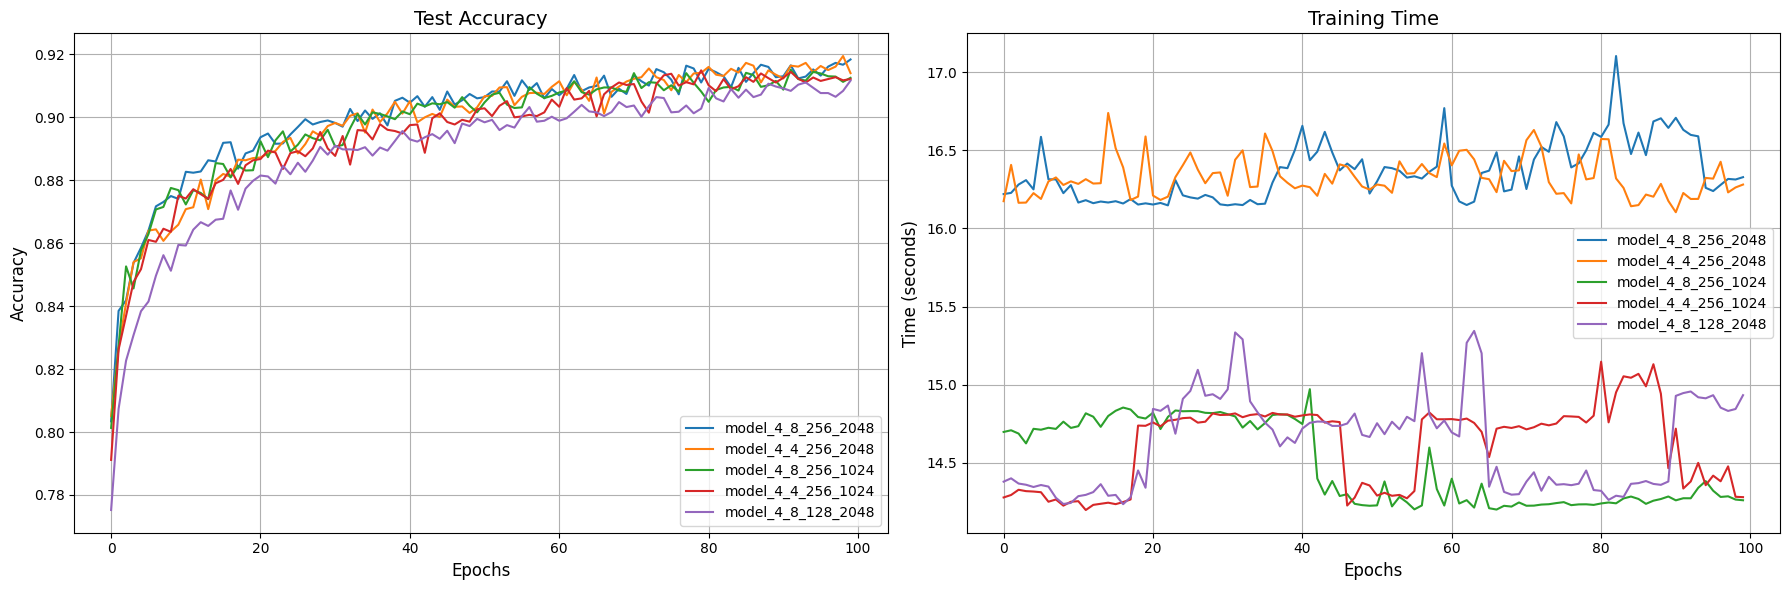

In [ ]:
fashion_df = pd.read_csv('results/results_FashionMNIST.csv', index_col=0)

# convert string representations of lists to actual lists
fashion_df['test_acc'] = fashion_df['test_acc'].apply(eval)
fashion_df['times'] = fashion_df['times'].apply(eval)

# sort by the test accuracy value the model end up with and select the top 5
fashion_df['last_test_acc'] = fashion_df['test_acc'].apply(lambda x: x[-1])
fashion_df = fashion_df.sort_values(by='last_test_acc', ascending=False).head(5)

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# test accuracy
for i in range(len(fashion_df)):
    ax[0].plot(fashion_df['test_acc'].iloc[i], label=fashion_df.index[i])

ax[0].set_title('Test Accuracy', fontsize=14)
ax[0].set_xlabel('Epochs', fontsize=12)
ax[0].set_ylabel('Accuracy', fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)

# training time
for i in range(len(fashion_df)):
    ax[1].plot(fashion_df['times'].iloc[i], label=fashion_df.index[i])

ax[1].set_title('Training Time', fontsize=14)
ax[1].set_xlabel('Epochs', fontsize=12)
ax[1].set_ylabel('Time (seconds)', fontsize=12)
ax[1].legend(fontsize=10)
ax[1].grid(True)

plt.tight_layout()
plt.show()

## 4.1.2 CIFAR-100

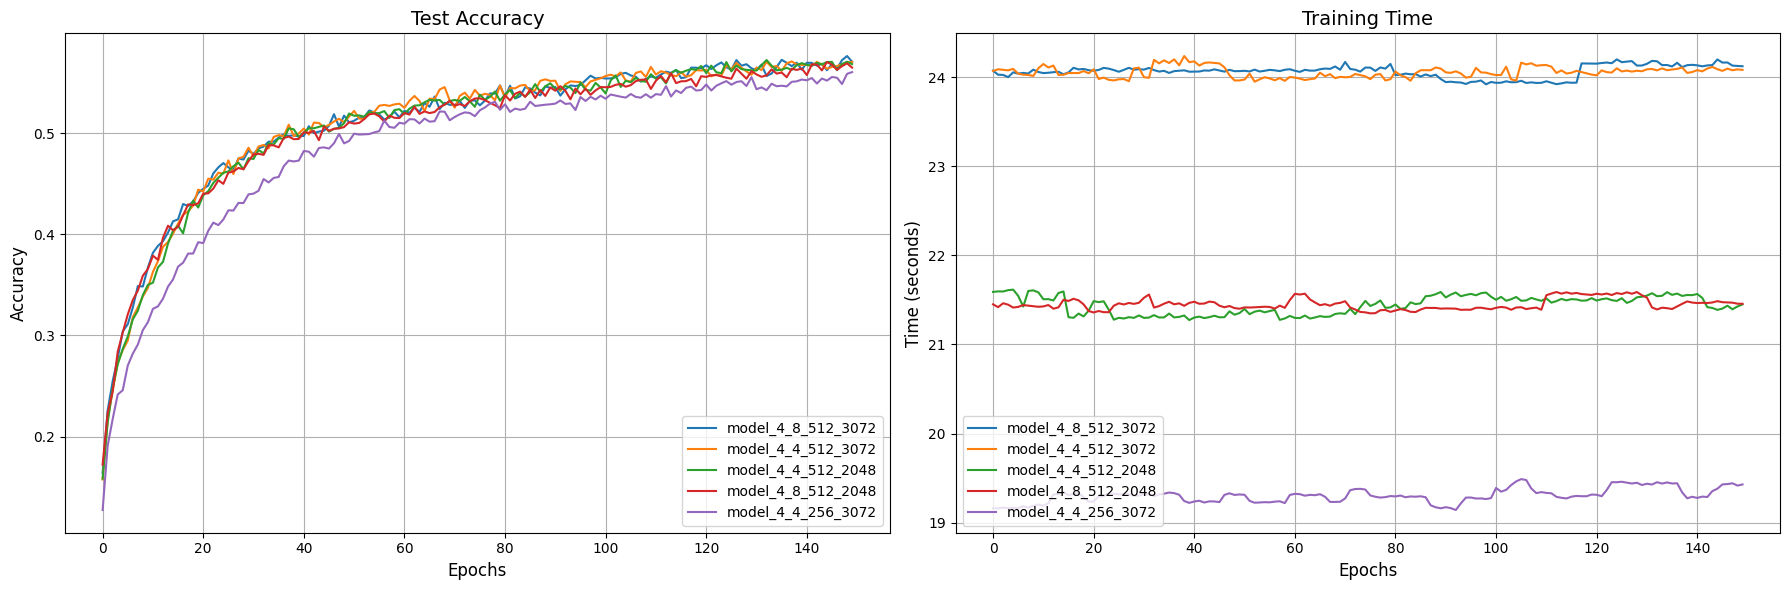

In [ ]:
cifar1_df = pd.read_csv('results/results_cifar100.csv', index_col=0)

# convert string representations of lists to actual lists
cifar1_df['test_acc'] = cifar1_df['test_acc'].apply(eval)
cifar1_df['times'] = cifar1_df['times'].apply(eval)

# sort by the test accuracy value the model end up with and select the top 5
cifar1_df['last_test_acc'] = cifar1_df['test_acc'].apply(lambda x: x[-1])
cifar1_df = cifar1_df.sort_values(by='last_test_acc', ascending=False).head(5)

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# test accuracy
for i in range(len(cifar1_df)):
    ax[0].plot(cifar1_df['test_acc'].iloc[i], label=cifar1_df.index[i])

ax[0].set_title('Test Accuracy', fontsize=14)
ax[0].set_xlabel('Epochs', fontsize=12)
ax[0].set_ylabel('Accuracy', fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)

# training time
for i in range(len(cifar1_df)):
    ax[1].plot(cifar1_df['times'].iloc[i], label=cifar1_df.index[i])

ax[1].set_title('Training Time', fontsize=14)
ax[1].set_xlabel('Epochs', fontsize=12)
ax[1].set_ylabel('Time (seconds)', fontsize=12)
ax[1].legend(fontsize=10)
ax[1].grid(True)

plt.tight_layout()
plt.show()

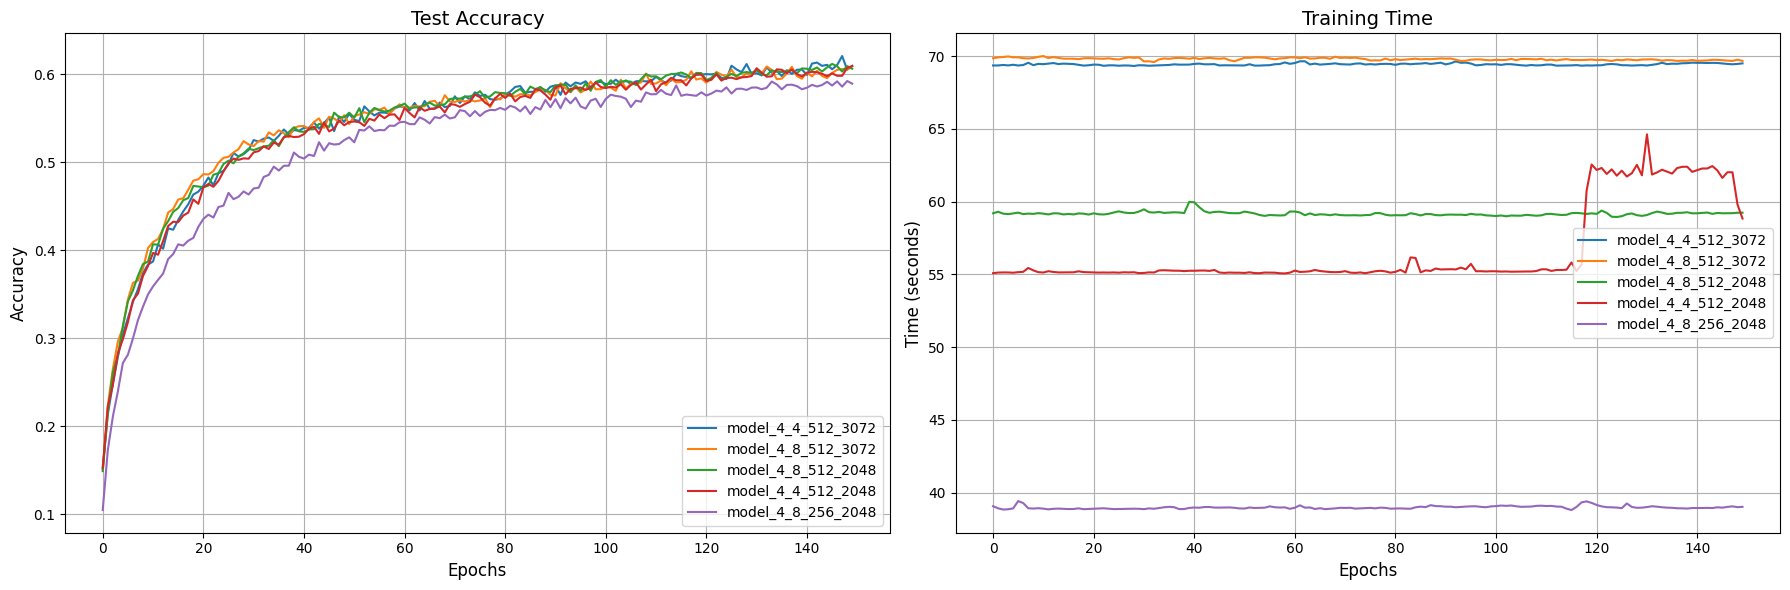

In [ ]:
cifar2_df = pd.read_csv('results/results_cifar100_96_8.csv', index_col=0)

# convert string representations of lists to actual lists
cifar2_df['test_acc'] = cifar2_df['test_acc'].apply(eval)
cifar2_df['times'] = cifar2_df['times'].apply(eval)

# sort by the test accuracy value the model end up with and select the top 5
cifar2_df['last_test_acc'] = cifar2_df['test_acc'].apply(lambda x: x[100])
cifar2_df = cifar2_df.sort_values(by='last_test_acc', ascending=False).head(5)

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# test accuracy
for i in range(len(cifar2_df)):
    ax[0].plot(cifar2_df['test_acc'].iloc[i], label=cifar2_df.index[i])

ax[0].set_title('Test Accuracy', fontsize=14)
ax[0].set_xlabel('Epochs', fontsize=12)
ax[0].set_ylabel('Accuracy', fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)

# training time
for i in range(len(cifar2_df)):
    ax[1].plot(cifar2_df['times'].iloc[i], label=cifar2_df.index[i])

ax[1].set_title('Training Time', fontsize=14)
ax[1].set_xlabel('Epochs', fontsize=12)
ax[1].set_ylabel('Time (seconds)', fontsize=12)
ax[1].legend(fontsize=10)
ax[1].grid(True)

plt.tight_layout()
plt.show()

# 4.2 Speed-Accuracy Tradeoffs with Fast Attention

## 4.2.1 Fashion-MNIST (ReLu vs. Softmax)

/var/folders/gq/tlxxp7tx2ss34jbnl893rhn80000gn/T/ipykernel_58019/2616455296.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FashionMNIST_base_performer_row['avg_time'] = FashionMNIST_base_performer_row['times'].apply(lambda x: sum(ast.literal_eval(x)[:100]) / 100) # first 100 average
/var/folders/gq/tlxxp7tx2ss34jbnl893rhn80000gn/T/ipykernel_58019/2616455296.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FashionMNIST_base_performer_row['last_test_acc'] = FashionMNIST_base_performer_row['test_acc'

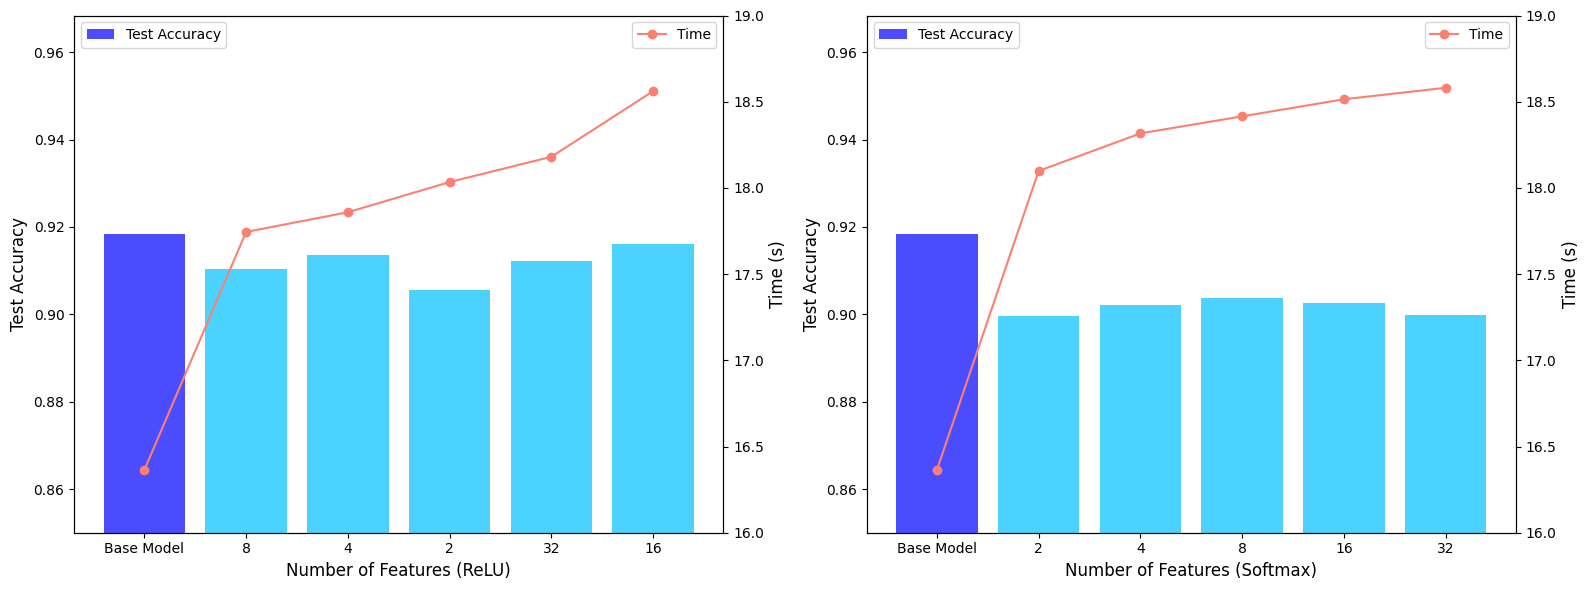

In [ ]:
# import files
FashionMNIST_base_performer = pd.read_csv('results/results_FashionMNIST.csv')
FashionMNIST_relu_performer = pd.read_csv('results/results_FashionMNIST_performer_relu.csv')
FashionMNIST_softmax_performer = pd.read_csv('results/results_FashionMNIST_performer_softmax.csv')

# function to extract features count from model name
def extract_features(model_name):
    if 'model_relu_' in model_name or 'model_softmax_' in model_name:
        return str(int(model_name.split('_')[-1]))
    return model_name

# base model data preprocessing
FashionMNIST_base_performer_row = FashionMNIST_base_performer[FashionMNIST_base_performer['Unnamed: 0'] == 'model_4_8_256_2048']

FashionMNIST_base_performer_row['avg_time'] = FashionMNIST_base_performer_row['times'].apply(lambda x: sum(ast.literal_eval(x)[:100]) / 100) # first 100 average
FashionMNIST_base_performer_row['last_test_acc'] = FashionMNIST_base_performer_row['test_acc'].apply(lambda x: ast.literal_eval(x)[99]) # 100th test acc



base_model_performer = pd.DataFrame([{
    'Unnamed: 0': 'Base Model',
    'avg_time': FashionMNIST_base_performer_row['avg_time'].values[0],
    'test_acc': FashionMNIST_base_performer_row['last_test_acc'].values[0]
}])


# relu model data preprocessing
FashionMNIST_relu_performer['avg_time'] = FashionMNIST_relu_performer['times'].apply(lambda x: sum(ast.literal_eval(x)[:100]) / 100) # first 100 average
FashionMNIST_relu_performer['test_acc'] = FashionMNIST_relu_performer['test_acc'].apply(lambda x: ast.literal_eval(x)[99]) # 100th test acc


combined_data_relu = pd.concat(
    [FashionMNIST_relu_performer[['Unnamed: 0', 'avg_time', 'test_acc']], base_model_performer],
    ignore_index=True
).sort_values(by='avg_time', ascending=True)

models_relu = combined_data_relu['Unnamed: 0'].apply(extract_features)
times_relu = combined_data_relu['avg_time']
test_acc_relu = combined_data_relu['test_acc']

# softmax model data preprocessing
FashionMNIST_softmax_performer['avg_time'] = FashionMNIST_softmax_performer['times'].apply(lambda x: sum(ast.literal_eval(x)[:100]) / 100) # first 100 average
FashionMNIST_softmax_performer['test_acc'] = FashionMNIST_softmax_performer['test_acc'].apply(lambda x: ast.literal_eval(x)[99]) # 100th test acc


combined_data_softmax = pd.concat(
    [FashionMNIST_softmax_performer[['Unnamed: 0', 'avg_time', 'test_acc']], base_model_performer],
    ignore_index=True
).sort_values(by='avg_time', ascending=True)

models_softmax = combined_data_softmax['Unnamed: 0'].apply(extract_features)
times_softmax = combined_data_softmax['avg_time']
test_acc_softmax = combined_data_softmax['test_acc']

# create chart

# side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# bar plot for ReLU
bar_colors_relu = ['blue' if model == 'Base Model' else 'deepskyblue' for model in combined_data_relu['Unnamed: 0']]
ax1.bar(models_relu, test_acc_relu, alpha=0.7, label='Test Accuracy', color=bar_colors_relu)
ax1.set_xlabel('Number of Features (ReLU)', fontsize=12)
ax1.set_ylabel('Test Accuracy', fontsize=12)
ax1.set_ylim(0.85, max(test_acc_relu) + 0.05)
ax1.tick_params(axis='y')
ax1.set_xticks(models_relu)
ax1.set_xticklabels(models_relu, rotation=0, fontsize=10)

# line plot for ReLU on secondary y-axis
ax1_twin = ax1.twinx()
ax1_twin.plot(models_relu, times_relu, color='salmon', marker='o', label='Time')
ax1_twin.set_ylabel('Time (s)', fontsize=12)
ax1_twin.set_ylim(16, 19)  # Custom Y-axis range
ax1_twin.set_yticks([16 + 0.5 * i for i in range(int((19 - 16) / 0.5) + 1)])
ax1_twin.tick_params(axis='y')

ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')


# bar plot for Softmax
bar_colors_softmax = ['blue' if model == 'Base Model' else 'deepskyblue' for model in combined_data_softmax['Unnamed: 0']]
ax2.bar(models_softmax, test_acc_softmax, alpha=0.7, label='Test Accuracy', color=bar_colors_softmax)
ax2.set_xlabel('Number of Features (Softmax)', fontsize=12)
ax2.set_ylabel('Test Accuracy', fontsize=12)
ax2.set_ylim(0.85, max(test_acc_softmax) + 0.05)
ax2.tick_params(axis='y')
ax2.set_xticks(models_softmax)
ax2.set_xticklabels(models_softmax, rotation=0, fontsize=10)

# line plot for Softmax on secondary y-axis
ax2_twin = ax2.twinx()
ax2_twin.plot(models_softmax, times_softmax, color='salmon', marker='o', label='Time')
ax2_twin.set_ylabel('Time (s)', fontsize=12)
ax2_twin.set_ylim(16, 19)  # Custom Y-axis range
ax2_twin.set_yticks([16 + 0.5 * i for i in range(int((19 - 16) / 0.5) + 1)])
ax2_twin.tick_params(axis='y')

ax2.legend(loc='upper left')
ax2_twin.legend(loc='upper right')

fig.tight_layout()
plt.show()


## 4.2.2 CIFAR-100 (72 Pixels Resize & 12 Pixels Patch)

/var/folders/gq/tlxxp7tx2ss34jbnl893rhn80000gn/T/ipykernel_58019/2982502717.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cifar_base_performer_row['avg_time_first_100'] = cifar_base_performer_row['times'].apply(lambda x: sum(ast.literal_eval(x)[:100]) / 100) # first 100 average
/var/folders/gq/tlxxp7tx2ss34jbnl893rhn80000gn/T/ipykernel_58019/2982502717.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cifar_base_performer_row['test_acc_100th'] = cifar_base_performer_row['test_acc'].apply(lambda x:

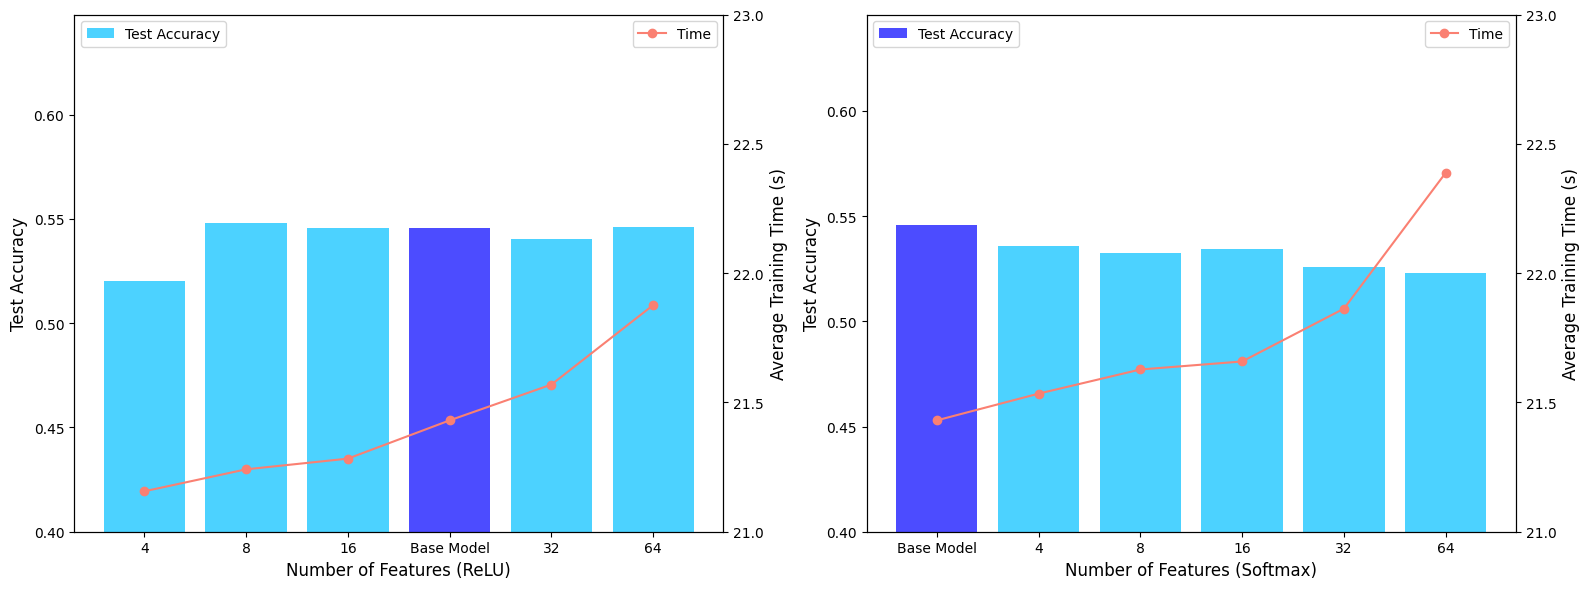

In [ ]:
# import files
cifar_base_performer = pd.read_csv('results/results_cifar100.csv')
cifar_relu_performer = pd.read_csv('results/results_cifar100_performer_relu.csv')
cifar_softmax_performer = pd.read_csv('results/results_cifar100_performer_softmax.csv')

# Function to extract features count from model name
def extract_features(model_name):
    if 'model_relu_' in model_name or 'model_softmax_' in model_name:
        return str(int(model_name.split('_')[-1]))  
    return model_name 

# base model data preprocessing
cifar_base_performer_row = cifar_base_performer[cifar_base_performer['Unnamed: 0'] == 'model_4_8_512_2048']
cifar_base_performer_row['avg_time_first_100'] = cifar_base_performer_row['times'].apply(lambda x: sum(ast.literal_eval(x)[:100]) / 100) # first 100 average
cifar_base_performer_row['test_acc_100th'] = cifar_base_performer_row['test_acc'].apply(lambda x: ast.literal_eval(x)[99]) # 100th test acc


base_model_performer = pd.DataFrame([{
    'Unnamed: 0': 'Base Model',
    'avg_time_first_100': cifar_base_performer_row['avg_time_first_100'].values[0],
    'test_acc_100th': cifar_base_performer_row['test_acc_100th'].values[0]
}])


# ReLU data preprocessing
cifar_relu_performer['avg_time_first_100'] = cifar_relu_performer['times'].apply(lambda x: sum(ast.literal_eval(x)[:100]) / 100) # first 100 average
cifar_relu_performer['test_acc_100th'] = cifar_relu_performer['test_acc'].apply(lambda x: ast.literal_eval(x)[99]) # 100th test acc

combined_data_relu = pd.concat(
    [cifar_relu_performer[['Unnamed: 0', 'avg_time_first_100', 'test_acc_100th']], base_model_performer],
    ignore_index=True
).sort_values(by='avg_time_first_100', ascending=True)

models_relu = combined_data_relu['Unnamed: 0'].apply(extract_features)
times_relu = combined_data_relu['avg_time_first_100']
test_acc_relu = combined_data_relu['test_acc_100th']


# Softmax data preprocessing
cifar_softmax_performer['avg_time_first_100'] = cifar_softmax_performer['times'].apply(lambda x: sum(ast.literal_eval(x)[:100]) / 100) # first 100 average
cifar_softmax_performer['test_acc_100th'] = cifar_softmax_performer['test_acc'].apply(lambda x: ast.literal_eval(x)[99]) # 100th test acc


combined_data_softmax = pd.concat(
    [cifar_softmax_performer[['Unnamed: 0', 'avg_time_first_100', 'test_acc_100th']], base_model_performer],
    ignore_index=True
).sort_values(by='avg_time_first_100', ascending=True)

models_softmax = combined_data_softmax['Unnamed: 0'].apply(extract_features)
times_softmax = combined_data_softmax['avg_time_first_100']
test_acc_softmax = combined_data_softmax['test_acc_100th']


# create plot

# side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# bar char for ReLU
bar_colors_relu = ['blue' if model == 'Base Model' else 'deepskyblue' for model in combined_data_relu['Unnamed: 0']]
ax1.bar(models_relu, test_acc_relu, alpha=0.7, label='Test Accuracy', color=bar_colors_relu)
ax1.set_xlabel('Number of Features (ReLU)', fontsize=12)
ax1.set_ylabel('Test Accuracy', fontsize=12)
ax1.set_ylim(0.40, max(test_acc_relu) + 0.1)
ax1.tick_params(axis='y')
ax1.set_xticks(models_relu)
ax1.set_xticklabels(models_relu, rotation=0, fontsize=10)

# line plot for ReLU on secondary y-axis
ax1_twin = ax1.twinx()
ax1_twin.plot(models_relu, times_relu, color='salmon', marker='o', label='Time')
ax1_twin.set_ylabel('Average Training Time (s)', fontsize=12)
ax1_twin.tick_params(axis='y')
ax1_twin.set_ylim(21, 23)
ax1_twin.set_yticks([21 + 0.5 * i for i in range(int((23 - 21) / 0.5) + 1)])

ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')

# bar plot for Softmax
bar_colors_softmax = ['blue' if model == 'Base Model' else 'deepskyblue' for model in combined_data_softmax['Unnamed: 0']]
ax2.bar(models_softmax, test_acc_softmax, alpha=0.7, label='Test Accuracy', color=bar_colors_softmax)
ax2.set_xlabel('Number of Features (Softmax)', fontsize=12)
ax2.set_ylabel('Test Accuracy', fontsize=12)
ax2.set_ylim(0.40, max(test_acc_softmax) + 0.1)
ax2.tick_params(axis='y')
ax2.set_xticks(models_softmax)
ax2.set_xticklabels(models_softmax, rotation=0, fontsize=10)

# line plot for Softmax on secondary y-axis
ax2_twin = ax2.twinx()
ax2_twin.plot(models_softmax, times_softmax, color='salmon', marker='o', label='Time')
ax2_twin.set_ylabel('Average Training Time (s)', fontsize=12)
ax2_twin.tick_params(axis='y')
ax2_twin.set_ylim(21, 23)
ax2_twin.set_yticks([21 + 0.5 * i for i in range(int((23 - 21) / 0.5) + 1)])

ax2.legend(loc='upper left')
ax2_twin.legend(loc='upper right')

fig.tight_layout()
plt.show()


## 4.2.3 CIFAR-100 (96 Pixels Resize & 8 Pixels Patch)

/var/folders/gq/tlxxp7tx2ss34jbnl893rhn80000gn/T/ipykernel_58019/770409807.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cifar_base_row['avg_time_first_100'] = cifar_base_row['times'].apply(lambda x: sum(ast.literal_eval(x)[:100]) / 100) # first 100th average time
/var/folders/gq/tlxxp7tx2ss34jbnl893rhn80000gn/T/ipykernel_58019/770409807.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cifar_base_row['100th_test_acc'] = cifar_base_row['test_acc'].apply(lambda x: ast.literal_eval(x)[99]) # 100th t

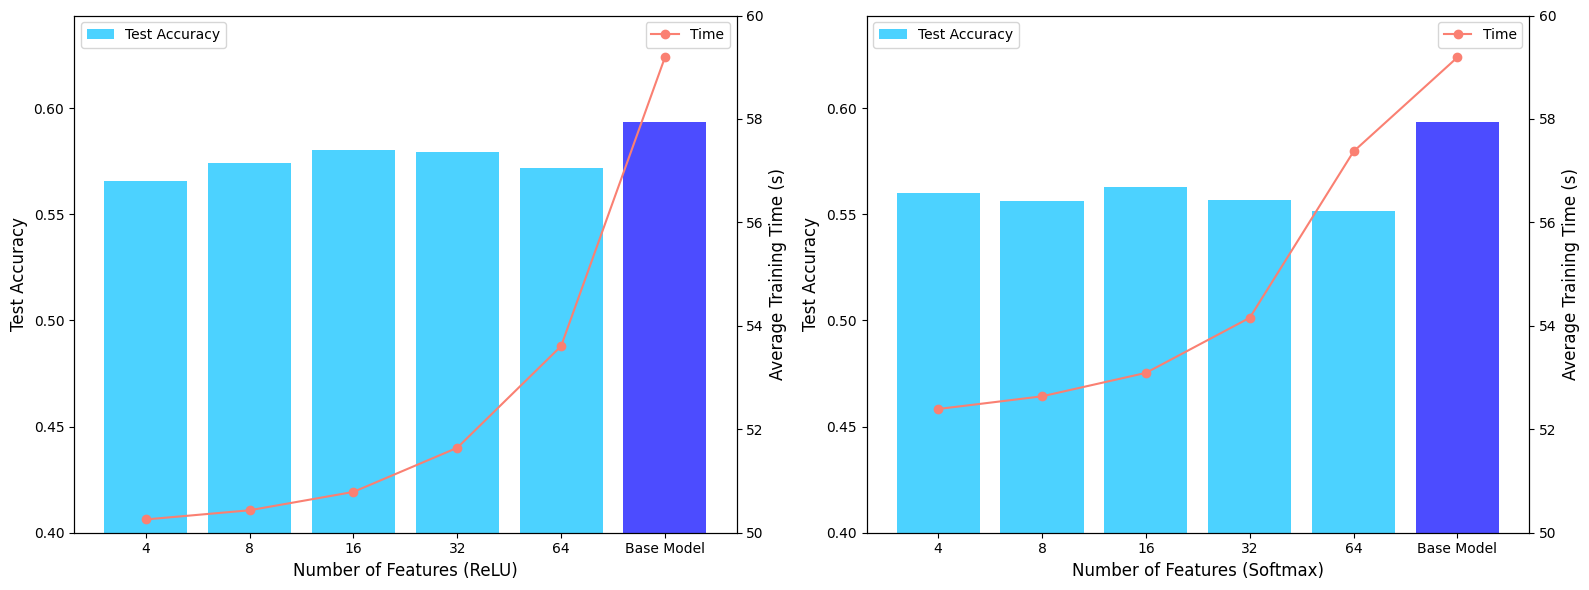

In [ ]:
# Import and process data for ReLU
cifar_base = pd.read_csv('results/results_cifar100_96_8.csv')
cifar_relu = pd.read_csv('results/results_cifar100_96_8_relu.csv')
cifar_softmax = pd.read_csv('results/results_cifar100_96_8_softmax.csv')

# Function to extract features count from model name
def extract_features(model_name):
    if 'model_relu_' in model_name or 'model_softmax_' in model_name:
        return str(int(model_name.split('_')[-1]))
    return model_name

# base model data preprocessing
cifar_base_row = cifar_base[cifar_base['Unnamed: 0'] == 'model_4_8_512_2048']
cifar_base_row['avg_time_first_100'] = cifar_base_row['times'].apply(lambda x: sum(ast.literal_eval(x)[:100]) / 100) # first 100th average time
cifar_base_row['100th_test_acc'] = cifar_base_row['test_acc'].apply(lambda x: ast.literal_eval(x)[99]) # 100th test acc

base_model_data = pd.DataFrame([{
    'Unnamed: 0': 'Base Model',
    'avg_time_first_100': cifar_base_row['avg_time_first_100'].values[0],
    '100th_test_acc': cifar_base_row['100th_test_acc'].values[0]
}])


#relu data preprocessing
cifar_relu['avg_time_first_100'] = cifar_relu['times'].apply(lambda x: sum(ast.literal_eval(x)[:100]) / 100) # first 100th average time
cifar_relu['100th_test_acc'] = cifar_relu['test_acc'].apply(lambda x: ast.literal_eval(x)[99]) # 100th test acc

combined_data_relu = pd.concat(
    [cifar_relu[['Unnamed: 0', 'avg_time_first_100', '100th_test_acc']], base_model_data],
    ignore_index=True
).sort_values(by='avg_time_first_100', ascending=True)

models_relu = combined_data_relu['Unnamed: 0'].apply(extract_features)
times_relu = combined_data_relu['avg_time_first_100']
test_acc_relu = combined_data_relu['100th_test_acc']


#softmax data preprocessing
cifar_softmax['avg_time_first_100'] = cifar_softmax['times'].apply(lambda x: sum(ast.literal_eval(x)[:100]) / 100) # first 100 average
cifar_softmax['100th_test_acc'] = cifar_softmax['test_acc'].apply(lambda x: ast.literal_eval(x)[99]) # 100th test acc

combined_data_softmax = pd.concat(
    [cifar_softmax[['Unnamed: 0', 'avg_time_first_100', '100th_test_acc']], base_model_data],
    ignore_index=True
).sort_values(by='avg_time_first_100', ascending=True)

models_softmax = combined_data_softmax['Unnamed: 0'].apply(extract_features)
times_softmax = combined_data_softmax['avg_time_first_100']
test_acc_softmax = combined_data_softmax['100th_test_acc']


# create plot

# side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# bar plot for ReLU
bar_colors_relu = ['blue' if model == 'Base Model' else 'deepskyblue' for model in models_relu]
ax1.bar(models_relu, test_acc_relu, alpha=0.7, label='Test Accuracy', color=bar_colors_relu)
ax1.set_xlabel('Number of Features (ReLU)', fontsize=12)
ax1.set_ylabel('Test Accuracy', fontsize=12)
ax1.set_ylim(0.40, max(test_acc_relu) + 0.05)
ax1.tick_params(axis='y')
ax1.set_xticks(models_relu)
ax1.set_xticklabels(models_relu, rotation=0, fontsize=10)

# line plot for ReLU on secondary y-axis
ax1_twin = ax1.twinx()
ax1_twin.plot(models_relu, times_relu, color='salmon', marker='o', label='Time')
ax1_twin.set_ylabel('Average Training Time (s)', fontsize=12)
ax1_twin.set_ylim(50, 60)
ax1_twin.tick_params(axis='y')

ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')


# bar plot for Softmax models
bar_colors_softmax = ['blue' if model == 'Base Model' else 'deepskyblue' for model in models_softmax]
ax2.bar(models_softmax, test_acc_softmax, alpha=0.7, label='Test Accuracy', color=bar_colors_softmax)
ax2.set_xlabel('Number of Features (Softmax)', fontsize=12)
ax2.set_ylabel('Test Accuracy', fontsize=12)
ax2.set_ylim(0.40, max(test_acc_softmax) + 0.05)
ax2.tick_params(axis='y')
ax2.set_xticks(models_softmax)
ax2.set_xticklabels(models_softmax, rotation=0, fontsize=10)

# line plot for Softmax on secondary y-axis
ax2_twin = ax2.twinx()
ax2_twin.plot(models_softmax, times_softmax, color='salmon', marker='o', label='Time')
ax2_twin.set_ylabel('Average Training Time (s)', fontsize=12)
ax2_twin.set_ylim(50, 60)
ax2_twin.tick_params(axis='y')

ax2.legend(loc='upper left')
ax2_twin.legend(loc='upper right')


fig.tight_layout()
plt.show()
